In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read the data and do data cleaning and preprocessing
data = pd.read_csv('boston.csv')

In [3]:
# Handle missing data if any
data.dropna(inplace=True)

X = data.drop(columns=['MEDV'])
y = data['MEDV']

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

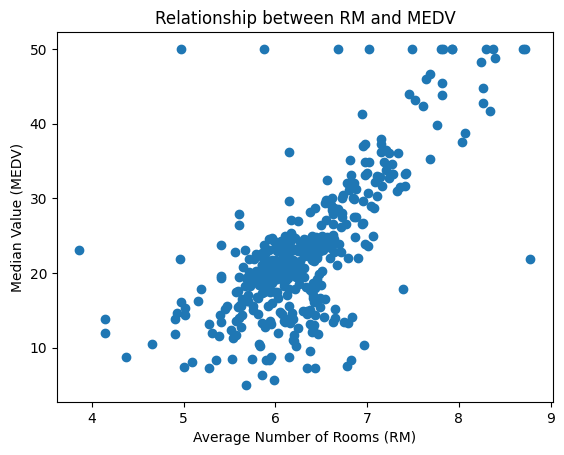

In [5]:
# Scatter plots
plt.scatter(X_train['RM'], y_train)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV)')
plt.title('Relationship between RM and MEDV')
plt.show()

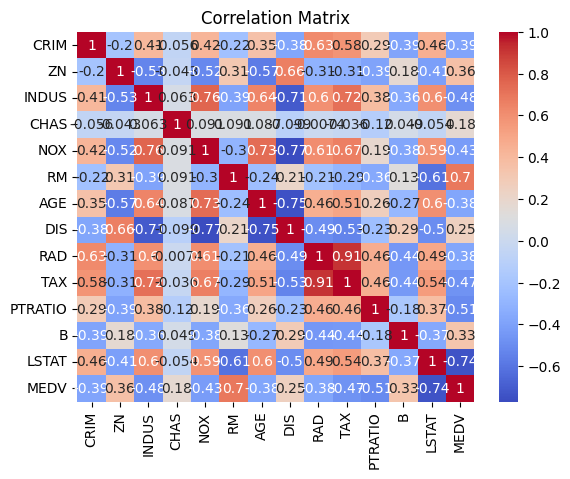

In [6]:
# Correlation matrices
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


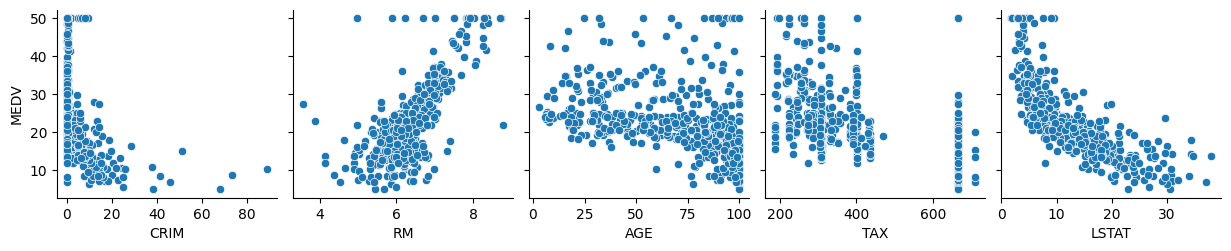

In [7]:
# Pairplot for multiple features
sns.pairplot(data, x_vars=['CRIM', 'RM', 'AGE', 'TAX', 'LSTAT'], y_vars='MEDV', kind='scatter')
plt.show()

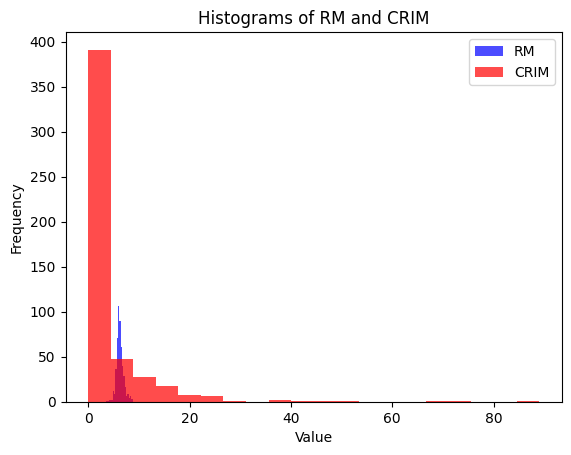

In [8]:
# Histograms for selected features
plt.hist(data['RM'], bins=20, color='blue', alpha=0.7, label='RM')
plt.hist(data['CRIM'], bins=20, color='red', alpha=0.7, label='CRIM')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of RM and CRIM')
plt.legend()
plt.show()

In [9]:
# Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Testing
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}\nR-squared (R2): {r2}")

Mean Squared Error: 24.291119474973538
R-squared (R2): 0.6687594935356317


In [11]:
# Make Predictions
new_data = pd.DataFrame({
    'CRIM': [0.1], 'ZN': [20], 'INDUS': [5], 'CHAS': [0],
    'NOX': [0.5], 'RM': [6.5], 'AGE': [50], 'DIS': [5],
    'RAD': [3], 'TAX': [300], 'PTRATIO': [15], 'B': [400],
    'LSTAT': [10]
})

print(f"Predicted house price: {model.predict(new_data)[0]}")

Predicted house price: 27.452754798887362


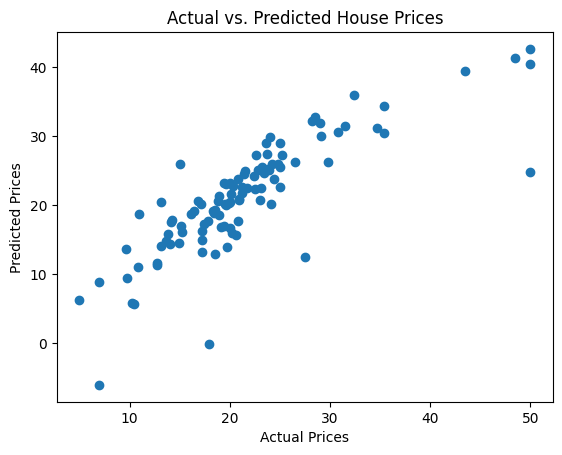

In [12]:
# Visualize the model's predictions compared to the actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

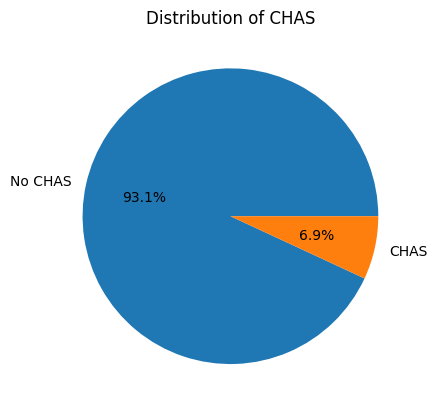

In [13]:
# Pie chart for the distribution of 'CHAS'
chas_counts = data['CHAS'].value_counts()
plt.pie(chas_counts, labels=['No CHAS', 'CHAS'], autopct='%1.1f%%')
plt.title('Distribution of CHAS')
plt.show()

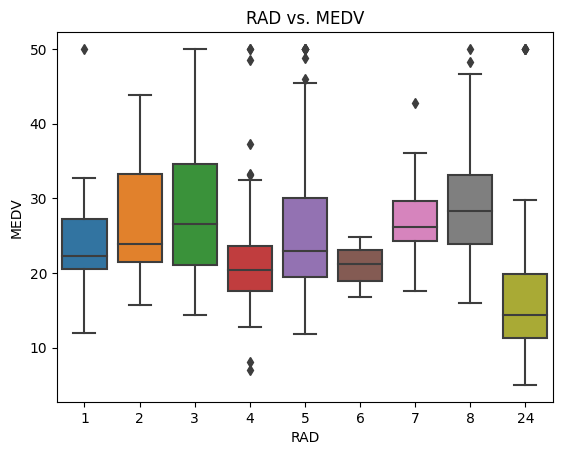

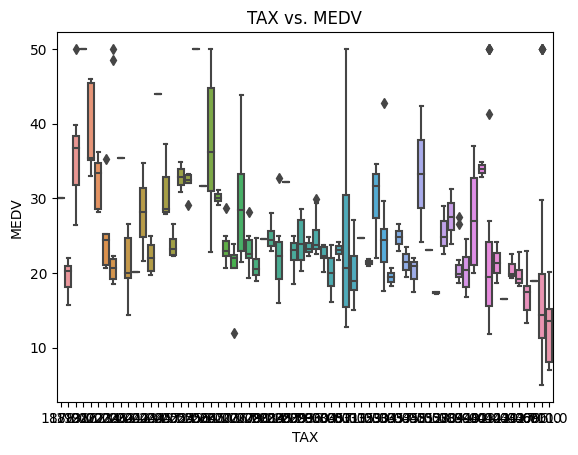

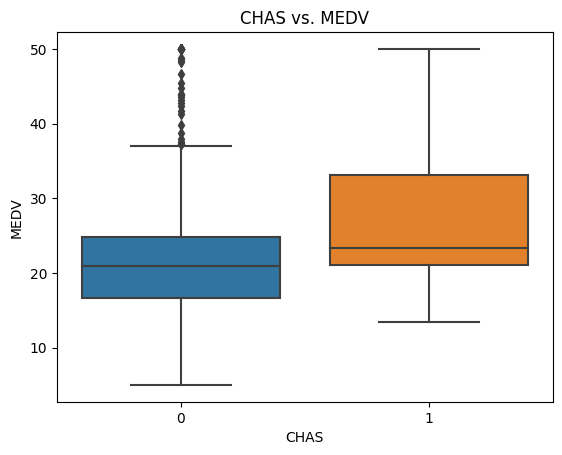

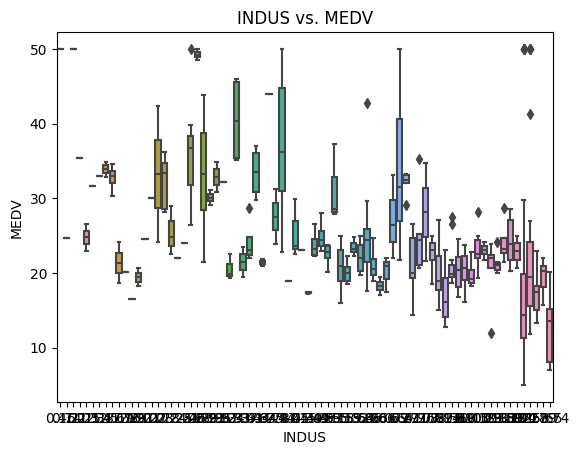

In [14]:
# Bar plot of the distribution of specific features
features_to_plot = ['RAD', 'TAX', 'CHAS', 'INDUS']

for feature in features_to_plot:
    sns.boxplot(x=feature, y='MEDV', data=data)
    plt.title(f'{feature} vs. MEDV')
    plt.show()